In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Load already prepared CK+
def load_CKplus_full():
  x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/inputs.csv",header=None)
  y = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/labels.csv",header=None)
  x, y = shuffle(x, y,random_state = 2021)

  x = np.array(x)
  x = x.reshape(len(x),48,48,1)
  y = np.array(y)
  return x, y

def load_CKplus_split():
  x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/inputs.csv",header=None)
  y = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/labels.csv",header=None)
  x, y = shuffle(x, y,random_state = 2021)
  x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=147, random_state=2021)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=147, random_state=2021)

  x_train = np.array(x_train)
  x_train = x_train.reshape(len(x_train),48,48,1)
  y_train = np.array(y_train)
  x_test = np.array(x_test)
  x_test = x_test.reshape(len(x_test),48,48,1)
  y_test = np.array(y_test)
  x_val = np.array(x_val)
  x_val = x_val.reshape(len(x_val),48,48,1)
  y_val = np.array(y_val)
  return x_train, y_train, x_test, y_test, x_val, y_val

#Load already prepared FER2013
def load_FER2013():
  x_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/x_train.csv",header=None,)
  y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/y_train.csv",header=None)
  x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/x_test.csv",header=None)
  y_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/y_test.csv",header=None)
  x_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/x_val.csv",header=None)
  y_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT723/y_val.csv",header=None)

  x_train = np.array(x_train)
  x_train = x_train.reshape(len(x_train),48,48,1)
  y_train = np.array(y_train)
  x_test = np.array(x_test)
  x_test = x_test.reshape(len(x_test),48,48,1)
  y_test = np.array(y_test)
  x_val = np.array(x_val)
  x_val = x_val.reshape(len(x_val),48,48,1)
  y_val = np.array(y_val)
  return x_train, y_train, x_test, y_test, x_val, y_val


x_train, y_train, x_test, y_test, x_val, y_val = load_FER2013()

x_train.shape, x_test.shape, x_val.shape


((28709, 48, 48, 1), (3589, 48, 48, 1), (3589, 48, 48, 1))

In [3]:
#face recognition packages
!pip install opencv-python
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=a89bc60cf15f8c7a94178351f427ed03bd4935b5402b9518b6a96206ea00d9a8
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Display 50 images from the train set in the form of 5x5 matrix with their respective labels:


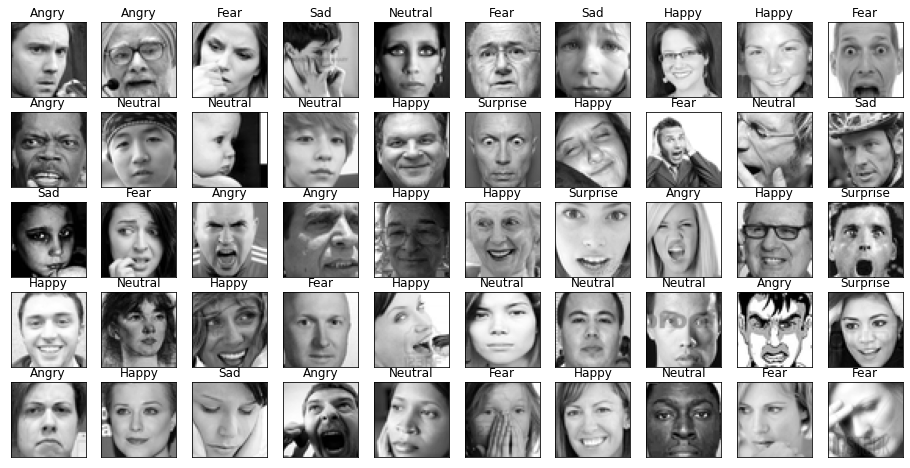

In [16]:
import matplotlib.pyplot as plt
# Displaying 25 images from training dataset in 5x5 matrix
emotion={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'} #for FER2013
#emotion = {0:'anger',1:'contempt',2:'disgust',3:'fear',4:'happy',5:'sadness',6:'surprise'} #for CK+
def plot_image(input_images,labels):
  print("Display 50 images from the train set in the form of 5x5 matrix with their respective labels:")
  plt.figure(figsize=[16,8])
  for i in range(50):
    plt.subplot(5,10,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(input_images[i].reshape([48,48]), cmap='gray')
    plt.title(emotion[int(labels[i])])
  plt.show()

plot_image(x_train,y_train)


Using real-time data augmentation.
Epoch 1/200
Learning rate:  0.01
57/57 [==============================] - 36s 494ms/step - loss: 1.9297 - accuracy: 0.2499 - val_loss: 1.9089 - val_accuracy: 0.2455

Epoch 00001: val_accuracy improved from -inf to 0.24547, saving model to /content/saved_models/FER2013_model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
Learning rate:  0.01
57/57 [==============================] - 26s 448ms/step - loss: 1.8413 - accuracy: 0.2585 - val_loss: 1.8823 - val_accuracy: 0.2449

Epoch 00002: val_accuracy did not improve from 0.24547
Epoch 3/200
Learning rate:  0.01
57/57 [==============================] - 26s 449ms/step - loss: 1.7812 - accuracy: 0.2974 - val_loss: 2.9731 - val_accuracy: 0.2229

Epoch 00003: val_accuracy did not improve from 0.24547
Epoch 4/200
Learning rate:  0.01
57/57 [==============================] - 27s 454ms/step - loss: 1.6473 - accuracy: 0.3891 - val_loss: 1.9670 - val_accuracy: 0.3040

Epoch 00004: val_accuracy improved from 0.24547 to 0.30398, saving model to /content/saved_models/FER2013_model.h5
Epoch 5/200
Learning rate:  0.01
57/57 [==============================] - 26s 452ms/step - loss: 1.5295 - accuracy: 0.4449 - val_loss: 1.8948 - val_accuracy: 0.3084

Epoch 00005: val_accuracy improved from 0.30398 to 0.30844, saving model to /content/saved_models/FER2013_model

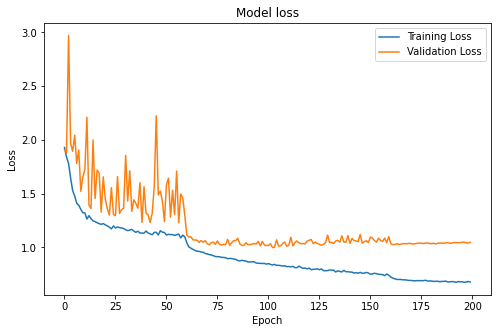

Plot the accuracy (Train and Validation)


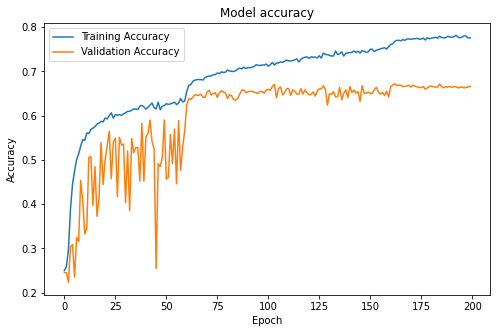

In [17]:
#CBAM 

from __future__ import print_function
import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import resnet_v1, mobilenets
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import callbacks as cb

# Training parameter
batch_size = 512
epochs = 200
data_augmentation = True
num_classes = 7

attention_module = 'cbam_block'
base_model = 'ResNet18'
dataset_type = 'FER2013'


# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255


# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)


depth = 20 # For ResNet, specify the depth (e.g. ResNet50: depth=50, ResNet101: Depth=101)
model = resnet_v1.resnet_v1(input_shape=input_shape, depth=depth,num_classes=7, attention_module='cbam_block')
#model = mobilenets.MobileNet(input_shape=input_shape, classes=num_classes, attention_module='cbam_block')
#model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr_schedule(0)),metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer= Adam(), #SGD(decay=2e-5, momentum=0.9, nesterov=True),
              metrics=['accuracy'])
#model.summary()

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = dataset_type + '_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)
def lr_schedule(epoch):
    lr = 0.01
    if epoch >= (epochs*0.8):
      lr = 0.0001
    elif epoch >= (epochs*0.3):
      lr=0.001
    print('Learning rate: ', lr)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val),shuffle=True, callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    datagen.fit(x_train)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_val, y_val),
                    epochs=epochs, verbose=1, workers=4,
                    callbacks=callbacks)

def plot_model_history(history):
  # Plot training loss values
  print("Plot loss values (Train vs. Validation)")
  plt.figure(figsize=(8, 5))
  plt.plot(history.history['loss'],label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

  print("Plot the accuracy (Train and Validation)")
  plt.figure(figsize=(8, 5))
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

plot_model_history(history)


In [18]:
best_model = keras.models.load_model('/content/saved_models/FER2013_model.h5')
best_model.evaluate(x_test, y_test)


113/113 [==============================] - 4s 22ms/step - loss: 1.0373 - accuracy: 0.6723


[1.0372816324234009, 0.6723321080207825]

Labels Dictionary:
{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
Number of predition samples =  3589


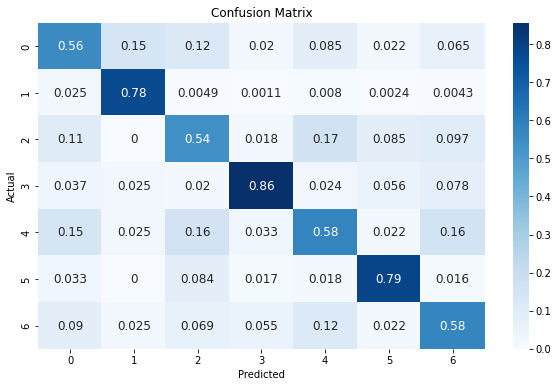

In [19]:
#test images
from sklearn.metrics import confusion_matrix
import seaborn as sn
emotion={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'} #for FER2013, JAFFE

print('Labels Dictionary:')
print(emotion)
print('Number of predition samples = ', len(x_test))
pred = model.predict(x_test)
cm = confusion_matrix( np.argmax(y_test,1),pred.argmax(1),normalize='pred')
#cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize =(10,6))
sn.heatmap(cm, annot=True, annot_kws={"size": 12},cmap=plt.cm.Blues) # font size
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()